In [11]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates as pcp

digits = datasets.load_digits()
n_samples = len(digits.images)
x = pd.DataFrame(digits.images.reshape((n_samples, -1)))
y = pd.Series(digits.target)
# fig, ax = plt.subplots()

In [113]:
df=pd.concat([x,y], axis=1)
df.columns=['c'+str(i) for i in range(len(df.columns))]

In [122]:
qr="index<50"
df1=df.query(qr)
qr="c64 in [3, 5,7]"
df1=df.query(qr)

<AxesSubplot:>

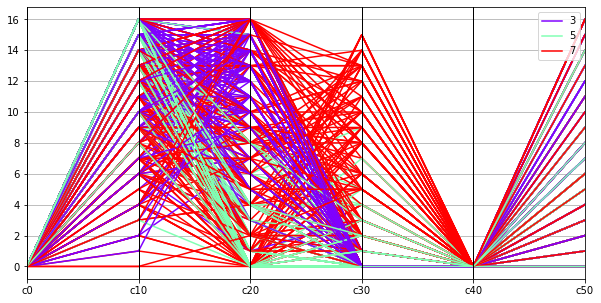

In [124]:
fig,ax=plt.subplots(figsize=(10,5))
pcp(df1, class_column='c64', colormap='rainbow', cols=['c0','c10','c20','c30','c40','c50'])
    
